In [1]:
from src.data.data_manager import DataManager
from src.data.data_labeling import DataLabeler
from src.features.feature_engineering import BuildFeatures
from src.features.feature_selection import SelectFeatures
from src.pipelines.data_pipeline import DataPipelineFactory
from src.pipelines.train_pipeline import TrainPipelineFactory
from src.data.data_validation import validate
from hydra import initialize, compose
import polars as pl
from omegaconf.omegaconf import OmegaConf
from config.config import update_processed_data_folder
import time
import random as rd

In [2]:
initialize(version_base=None, config_path="config", job_name="test")
cfg = compose(config_name="general.yaml", return_hydra_config=True)

In [3]:
dm = DataManager(cfg)
dl = DataLabeler(cfg)

In [18]:
shares = list(OmegaConf.to_container(OmegaConf.load(cfg.paths.shares_dict)).keys())

In [39]:
# for i in range(len(shares)):
#     sh = dm.load_share(shares[i])
#     sh = sh.fill_nan(None)
#     if any((sh.null_count().to_numpy() == 1)[0]):
#         print(shares[i])
#         break

BBG000RJWGC4


In [4]:
sh = dm.load_share('BBG004S68758')

In [5]:
len(sh)

1214

In [37]:
sh, labels = dl.fit(sh)

In [38]:
print(len(sh), len(labels[labels == 1]))

1061 19


In [39]:
sh = validate(sh)

In [40]:
import matplotlib.pyplot as plt

In [56]:
a = 0
b = 66

(1719842114.0, 1719904634.0)

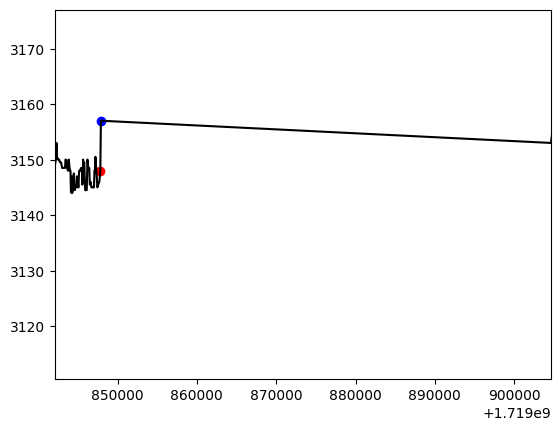

In [57]:
plt.plot(sh['time'].to_numpy(), sh['price_last'].to_numpy(), color='black')
plt.scatter(sh['time'].to_numpy()[labels==1], sh['price_last'].to_numpy()[labels==1], color='r')
plt.scatter(sh['time'].to_numpy()[labels==2], sh['price_last'].to_numpy()[labels==2], color='b')
plt.xlim(sh['time'][a], sh['time'][b])

In [7]:
sh = validate(sh)

In [8]:
sh, labels = dl.fit(sh)

In [33]:
time_column = sh.select(['time']).to_series()
sh = sh.drop(['time'])

In [34]:
sh.insert_column(0, time_column)

time,buyers_count,buyers_quantity,sellers_count,sellers_quantity,price_min,price_max,price_std,price_last,bids_min,bids_max,bids_std,bids_last,asks_min,asks_max,asks_std,asks_last,weighted_bid_min,weighted_bid_max,weighted_bid_std,weighted_bid_last,weighted_ask_min,weighted_ask_max,weighted_ask_std,weighted_ask_last,bid_to_ask_ratio_min,bid_to_ask_ratio_max,bid_to_ask_ratio_std,bid_to_ask_ratio_last
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.7198e9,1.0,1.0,0.0,0.0,3149.0,3149.0,0.0,3149.0,679.0,710.0,10.859507,685.0,425.0,520.0,26.089589,477.0,3146.25284,3146.41022,0.050172,3146.41022,3155.94444,3156.7602,0.170652,3155.94444,1.30829,1.61176,0.078893,1.43606
1.7198e9,2.0,8.0,3.0,8.0,3150.0,3153.0,1.35654,3150.0,402.0,700.0,121.064453,467.0,216.0,474.0,95.870642,274.0,3146.48487,3148.53856,0.769948,3147.74411,3155.12896,3157.10278,0.620493,3155.65328,0.93696,3.24074,0.669301,1.70438
1.7198e9,4.0,7.0,2.0,4.0,3153.0,3153.0,0.0,3153.0,349.0,1399.0,185.433977,349.0,267.0,1011.0,142.029105,1011.0,3148.13499,3151.21909,0.563688,3148.96991,3155.79426,3158.14859,0.458706,3155.79426,0.3452,4.71044,0.727325,0.3452
1.7198e9,1.0,1.0,2.0,5.0,3150.5,3153.0,0.808901,3150.5,412.0,504.0,32.418369,499.0,172.0,2368.0,625.171999,454.0,3147.58988,3148.43932,0.26107,3147.61723,3152.0644,3156.67401,1.606225,3156.67401,0.18159,2.78488,0.67557,1.09912
1.7198e9,0.0,0.0,2.0,8.0,3150.0,3150.0,0.0,3150.0,490.0,729.0,112.203007,495.0,284.0,516.0,47.711719,516.0,3146.44751,3147.63636,0.569952,3147.63131,3155.67782,3157.1596,0.325807,3156.87209,0.9593,1.74296,0.239929,0.9593
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1.7201e9,1.0,5.0,1.0,21.0,3099.5,3099.5,0.0,3099.5,236.0,408.0,47.092221,236.0,416.0,935.0,135.520877,416.0,3093.13215,3096.63771,0.907405,3096.63771,3104.75817,3107.54971,0.811949,3106.28005,0.29305,0.98077,0.149919,0.56731
1.7201e9,8.0,107.0,3.0,20.0,3105.0,3106.5,0.506248,3106.5,165.0,407.0,76.112732,175.0,433.0,1589.0,281.798002,497.0,3096.86241,3100.18485,1.002867,3099.27429,3108.68554,3110.48929,0.396402,3109.58451,0.15464,0.64103,0.102929,0.35211
1.7201e9,1.0,1.0,0.0,0.0,3103.5,3103.5,0.0,3103.5,149.0,242.0,15.737232,175.0,451.0,1061.0,85.84658,602.0,3098.2686,3102.03429,0.919394,3102.03429,3108.59839,3111.91528,0.641131,3111.91528,0.17952,0.49897,0.050322,0.2907


In [22]:
sh

time,buyers_count,buyers_quantity,sellers_count,sellers_quantity,price_min,price_max,price_std,price_last,bids_min,bids_max,bids_std,bids_last,asks_min,asks_max,asks_std,asks_last,weighted_bid_min,weighted_bid_max,weighted_bid_std,weighted_bid_last,weighted_ask_min,weighted_ask_max,weighted_ask_std,weighted_ask_last,bid_to_ask_ratio_min,bid_to_ask_ratio_max,bid_to_ask_ratio_std,bid_to_ask_ratio_last
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.7198e9,1.0,1.0,0.0,0.0,3149.0,3149.0,0.0,3149.0,679.0,710.0,10.859507,685.0,425.0,520.0,26.089589,477.0,3146.25284,3146.41022,0.050172,3146.41022,3155.94444,3156.7602,0.170652,3155.94444,1.30829,1.61176,0.078893,1.43606
1.7198e9,2.0,8.0,3.0,8.0,3150.0,3153.0,1.35654,3150.0,402.0,700.0,121.064453,467.0,216.0,474.0,95.870642,274.0,3146.48487,3148.53856,0.769948,3147.74411,3155.12896,3157.10278,0.620493,3155.65328,0.93696,3.24074,0.669301,1.70438
1.7198e9,4.0,7.0,2.0,4.0,3153.0,3153.0,0.0,3153.0,349.0,1399.0,185.433977,349.0,267.0,1011.0,142.029105,1011.0,3148.13499,3151.21909,0.563688,3148.96991,3155.79426,3158.14859,0.458706,3155.79426,0.3452,4.71044,0.727325,0.3452
1.7198e9,1.0,1.0,2.0,5.0,3150.5,3153.0,0.808901,3150.5,412.0,504.0,32.418369,499.0,172.0,2368.0,625.171999,454.0,3147.58988,3148.43932,0.26107,3147.61723,3152.0644,3156.67401,1.606225,3156.67401,0.18159,2.78488,0.67557,1.09912
1.7198e9,0.0,0.0,2.0,8.0,3150.0,3150.0,0.0,3150.0,490.0,729.0,112.203007,495.0,284.0,516.0,47.711719,516.0,3146.44751,3147.63636,0.569952,3147.63131,3155.67782,3157.1596,0.325807,3156.87209,0.9593,1.74296,0.239929,0.9593
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1.7201e9,1.0,5.0,1.0,21.0,3099.5,3099.5,0.0,3099.5,236.0,408.0,47.092221,236.0,416.0,935.0,135.520877,416.0,3093.13215,3096.63771,0.907405,3096.63771,3104.75817,3107.54971,0.811949,3106.28005,0.29305,0.98077,0.149919,0.56731
1.7201e9,8.0,107.0,3.0,20.0,3105.0,3106.5,0.506248,3106.5,165.0,407.0,76.112732,175.0,433.0,1589.0,281.798002,497.0,3096.86241,3100.18485,1.002867,3099.27429,3108.68554,3110.48929,0.396402,3109.58451,0.15464,0.64103,0.102929,0.35211
1.7201e9,1.0,1.0,0.0,0.0,3103.5,3103.5,0.0,3103.5,149.0,242.0,15.737232,175.0,451.0,1061.0,85.84658,602.0,3098.2686,3102.03429,0.919394,3102.03429,3108.59839,3111.91528,0.641131,3111.91528,0.17952,0.49897,0.050322,0.2907


In [32]:
time_column

time
f64
1.7198e9
1.7198e9
1.7198e9
1.7198e9
1.7198e9
…
1.7201e9
1.7201e9
1.7201e9


In [38]:
sh.drop('time')

buyers_count,buyers_quantity,sellers_count,sellers_quantity,price_min,price_max,price_std,price_last,bids_min,bids_max,bids_std,bids_last,asks_min,asks_max,asks_std,asks_last,weighted_bid_min,weighted_bid_max,weighted_bid_std,weighted_bid_last,weighted_ask_min,weighted_ask_max,weighted_ask_std,weighted_ask_last,bid_to_ask_ratio_min,bid_to_ask_ratio_max,bid_to_ask_ratio_std,bid_to_ask_ratio_last
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,1.0,0.0,0.0,3149.0,3149.0,0.0,3149.0,679.0,710.0,10.859507,685.0,425.0,520.0,26.089589,477.0,3146.25284,3146.41022,0.050172,3146.41022,3155.94444,3156.7602,0.170652,3155.94444,1.30829,1.61176,0.078893,1.43606
2.0,8.0,3.0,8.0,3150.0,3153.0,1.35654,3150.0,402.0,700.0,121.064453,467.0,216.0,474.0,95.870642,274.0,3146.48487,3148.53856,0.769948,3147.74411,3155.12896,3157.10278,0.620493,3155.65328,0.93696,3.24074,0.669301,1.70438
4.0,7.0,2.0,4.0,3153.0,3153.0,0.0,3153.0,349.0,1399.0,185.433977,349.0,267.0,1011.0,142.029105,1011.0,3148.13499,3151.21909,0.563688,3148.96991,3155.79426,3158.14859,0.458706,3155.79426,0.3452,4.71044,0.727325,0.3452
1.0,1.0,2.0,5.0,3150.5,3153.0,0.808901,3150.5,412.0,504.0,32.418369,499.0,172.0,2368.0,625.171999,454.0,3147.58988,3148.43932,0.26107,3147.61723,3152.0644,3156.67401,1.606225,3156.67401,0.18159,2.78488,0.67557,1.09912
0.0,0.0,2.0,8.0,3150.0,3150.0,0.0,3150.0,490.0,729.0,112.203007,495.0,284.0,516.0,47.711719,516.0,3146.44751,3147.63636,0.569952,3147.63131,3155.67782,3157.1596,0.325807,3156.87209,0.9593,1.74296,0.239929,0.9593
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1.0,5.0,1.0,21.0,3099.5,3099.5,0.0,3099.5,236.0,408.0,47.092221,236.0,416.0,935.0,135.520877,416.0,3093.13215,3096.63771,0.907405,3096.63771,3104.75817,3107.54971,0.811949,3106.28005,0.29305,0.98077,0.149919,0.56731
8.0,107.0,3.0,20.0,3105.0,3106.5,0.506248,3106.5,165.0,407.0,76.112732,175.0,433.0,1589.0,281.798002,497.0,3096.86241,3100.18485,1.002867,3099.27429,3108.68554,3110.48929,0.396402,3109.58451,0.15464,0.64103,0.102929,0.35211
1.0,1.0,0.0,0.0,3103.5,3103.5,0.0,3103.5,149.0,242.0,15.737232,175.0,451.0,1061.0,85.84658,602.0,3098.2686,3102.03429,0.919394,3102.03429,3108.59839,3111.91528,0.641131,3111.91528,0.17952,0.49897,0.050322,0.2907


In [37]:
sh

time,buyers_count,buyers_quantity,sellers_count,sellers_quantity,price_min,price_max,price_std,price_last,bids_min,bids_max,bids_std,bids_last,asks_min,asks_max,asks_std,asks_last,weighted_bid_min,weighted_bid_max,weighted_bid_std,weighted_bid_last,weighted_ask_min,weighted_ask_max,weighted_ask_std,weighted_ask_last,bid_to_ask_ratio_min,bid_to_ask_ratio_max,bid_to_ask_ratio_std,bid_to_ask_ratio_last
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.7198e9,1.0,1.0,0.0,0.0,3149.0,3149.0,0.0,3149.0,679.0,710.0,10.859507,685.0,425.0,520.0,26.089589,477.0,3146.25284,3146.41022,0.050172,3146.41022,3155.94444,3156.7602,0.170652,3155.94444,1.30829,1.61176,0.078893,1.43606
1.7198e9,2.0,8.0,3.0,8.0,3150.0,3153.0,1.35654,3150.0,402.0,700.0,121.064453,467.0,216.0,474.0,95.870642,274.0,3146.48487,3148.53856,0.769948,3147.74411,3155.12896,3157.10278,0.620493,3155.65328,0.93696,3.24074,0.669301,1.70438
1.7198e9,4.0,7.0,2.0,4.0,3153.0,3153.0,0.0,3153.0,349.0,1399.0,185.433977,349.0,267.0,1011.0,142.029105,1011.0,3148.13499,3151.21909,0.563688,3148.96991,3155.79426,3158.14859,0.458706,3155.79426,0.3452,4.71044,0.727325,0.3452
1.7198e9,1.0,1.0,2.0,5.0,3150.5,3153.0,0.808901,3150.5,412.0,504.0,32.418369,499.0,172.0,2368.0,625.171999,454.0,3147.58988,3148.43932,0.26107,3147.61723,3152.0644,3156.67401,1.606225,3156.67401,0.18159,2.78488,0.67557,1.09912
1.7198e9,0.0,0.0,2.0,8.0,3150.0,3150.0,0.0,3150.0,490.0,729.0,112.203007,495.0,284.0,516.0,47.711719,516.0,3146.44751,3147.63636,0.569952,3147.63131,3155.67782,3157.1596,0.325807,3156.87209,0.9593,1.74296,0.239929,0.9593
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1.7201e9,1.0,5.0,1.0,21.0,3099.5,3099.5,0.0,3099.5,236.0,408.0,47.092221,236.0,416.0,935.0,135.520877,416.0,3093.13215,3096.63771,0.907405,3096.63771,3104.75817,3107.54971,0.811949,3106.28005,0.29305,0.98077,0.149919,0.56731
1.7201e9,8.0,107.0,3.0,20.0,3105.0,3106.5,0.506248,3106.5,165.0,407.0,76.112732,175.0,433.0,1589.0,281.798002,497.0,3096.86241,3100.18485,1.002867,3099.27429,3108.68554,3110.48929,0.396402,3109.58451,0.15464,0.64103,0.102929,0.35211
1.7201e9,1.0,1.0,0.0,0.0,3103.5,3103.5,0.0,3103.5,149.0,242.0,15.737232,175.0,451.0,1061.0,85.84658,602.0,3098.2686,3102.03429,0.919394,3102.03429,3108.59839,3111.91528,0.641131,3111.91528,0.17952,0.49897,0.050322,0.2907


In [20]:
from omegaconf import OmegaConf
from cachetools import TTLCache
from functools import cache

In [ ]:
cache = TTLCache(1, 3600)

In [21]:
@cache
def get_trading_shares():
    return dict(OmegaConf.load('D:\Tinkoff-Trade-Assistant\config\shares.yaml'))

def get_shares_endpoint():
    shares = get_trading_shares()
    return shares

In [22]:
%timeit get_shares_endpoint()

153 ns ± 3.7 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
